In [1]:
import pandas
import matplotlib
import numpy
import datetime
import sklearn.tree
import sklearn.grid_search
import pandas_datareader.data 
%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# have to do the regression twice.. for buyers and sellers. and u want to know the most positive min in each instance.
# think about the information u have.. what is volatility like. what is volatility like in other currencies.
# what direction is it trend 15mins. 5mins. and 1min.
# what time of day is it.
# based on this what is the best time to hedge, if u want to avoid volatility. ie if it moves agst u... hold on. 
# if it doesnt move against u. cover in 1 min.
# results should be the same for buyers and sellers
# so what data do i want
# 1. time in hour bucket
# 2. standard deviation in 1 minute, 8 minute and 15 minute periods
# 3. price return in 1 minute, 8 minute and 15 minute periods
# 4. relative difference in standard deviation in 1 minute, 8 minute and 15 minute periods from eurusd and usdjpy
# 5. relative differences in price return in 1 minute, 8 minute and 15 minute periods from eurusd and usdjpy
# 6. what minute post trade is the price deviation, the most positive, the most negative, and the closest to zero
# use 1-5 to see their respective predictive powers for 6
# decision tree from 1-5 to pick most positive, most negative and closest to zero; this is the project goal

# so what do i need to do to get the data i want
# 1. import the eurusd and usdjpy price data
# 2. combine them with audusd price data
# 3. create a column which numbers each an hour from 0-23
# 4. create 9 columns which give the standard deviation in 1min, 8min and 15min for each currency
# 5. create 9 columns which give the preceding price return for each currency in 1min, 8min and 15min for each ccy
# 6. create 6 new columns which are the difference between aud SD and eur and jpy SD
# 7. create 6 new columns which are the difference between aud returns and eur and jpy returns
# 8. create 3 new columns which give the minute with the most positive, most negative and closest to zero aud returns

# then what regression.. i suspect random forest and decision tree

In [3]:
# import raw data; AUDUSD 1 min intervals


aud_data = pandas.read_csv('ga_project/HIST DATA/DAT_ASCII_AUDUSD_M1_2016.csv')

aud_data

,date,time,price,return_1,return_8,return_15,hour_bucket
0,20160103,170000,0.72832,0.000000,0.000000,0.000000,17
1,20160103,170300,0.72824,-0.000110,0.000000,0.000000,17
2,20160103,170400,0.72844,0.000275,0.000000,0.000000,17
3,20160103,170500,0.72850,0.000082,0.000000,0.000000,17
4,20160103,170600,0.72846,-0.000055,0.000000,0.000000,17
5,20160103,170800,0.72848,0.000027,0.000000,0.000000,17
6,20160103,170900,0.72859,0.000151,0.000000,0.000000,17
7,20160103,171000,0.72858,-0.000014,0.000000,0.000000,17
8,20160103,171100,0.72870,0.000165,0.000522,0.000000,17
9,20160103,171200,0.72865,-0.000069,0.000563,0.000000,17


In [4]:
#aud_data.to_csv('out1.csv')

In [5]:
aud_data
hours = aud_data['time']
aud_hours = aud_data.ix[:, ['date','time','hour_bucket']]
hours

0         170000
1         170300
2         170400
3         170500
4         170600
5         170800
6         170900
7         171000
8         171100
9         171200
10        171400
11        171500
12        171600
13        171800
14        171900
15        172000
16        172100
17        172300
18        172400
19        172600
20        172700
21        172800
22        172900
23        173000
24        173100
25        173200
26        173300
27        173400
28        173500
29        173600
           ...  
370975    162500
370976    162600
370977    162700
370978    162800
370979    162900
370980    163000
370981    163100
370982    163200
370983    163300
370984    163400
370985    163500
370986    163600
370987    163800
370988    163900
370989    164100
370990    164200
370991    164300
370992    164400
370993    164500
370994    164600
370995    164800
370996    164900
370997    165000
370998    165100
370999    165200
371000    165300
371001    165400
371002    1655

In [6]:
# standard deviation

std2 = aud_data['price'].rolling(2).std()
std8 = aud_data['price'].rolling(8).std()
std15 = aud_data['price'].rolling(15).std()


In [7]:
# price returns

aud_datetime = aud_data.ix[:, ['date','time','hour_bucket']]
aud_lows = aud_data.ix[:, ['price']]
aud_returns = aud_data.ix[:,['return_1','return_8','return_15']]
aud_returns_data = pandas.concat([aud_datetime,aud_returns,aud_lows], axis=1)
aud_returns_data.columns = ['date','time','hour_bucket','return_1','return_8','return_15','price']



In [8]:

aud_price = aud_returns_data.ix[:, ['price']]
len(aud_price.columns)
aud_price1 = aud_price.price.shift(1)
aud_wlagged = pandas.concat([aud_returns_data,aud_price1], axis=1)
len(aud_wlagged.columns)
aud_price1 = aud_price.price.shift(1)
aud_price2 = aud_price.price.shift(2)
aud_price3 = aud_price.price.shift(3)
aud_price4 = aud_price.price.shift(4)
aud_price5 = aud_price.price.shift(5)
aud_price6 = aud_price.price.shift(6)
aud_price7 = aud_price.price.shift(7)
aud_price8 = aud_price.price.shift(8)
aud_price9 = aud_price.price.shift(9)
aud_price10 = aud_price.price.shift(10)
aud_price11 = aud_price.price.shift(11)
aud_price12 = aud_price.price.shift(12)
aud_price13 = aud_price.price.shift(13)
aud_price14 = aud_price.price.shift(14)


aud_wlagged = pandas.concat([aud_returns_data,aud_price1], axis=1)
aud_wlagged = pandas.concat([aud_returns_data, std2, std8, std15, aud_price1,aud_price2,aud_price3,aud_price4,
                                aud_price5,aud_price6,aud_price7,aud_price8,aud_price9,aud_price10,
                                 aud_price11,aud_price12,aud_price13,aud_price14], axis=1)


In [9]:
aud_wlagged.columns = ['date', 'time','hour_bucket','return_1','return_8','return_15','price','std2', 'std8', 'std15','1min','2min','3min','4min','5min','6min','7min','8min','9min',
                      '10min','11min','12min','13min','14min']
aud_wlagged

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,5min,6min,7min,8min,9min,10min,11min,12min,13min,14min
0,20160103,170000,17,0.000000,0.000000,0.000000,0.72832,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160103,170300,17,-0.000110,0.000000,0.000000,0.72824,5.656854e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20160103,170400,17,0.000275,0.000000,0.000000,0.72844,1.414214e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20160103,170500,17,0.000082,0.000000,0.000000,0.72850,4.242641e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20160103,170600,17,-0.000055,0.000000,0.000000,0.72846,2.828427e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20160103,170800,17,0.000027,0.000000,0.000000,0.72848,1.414214e-05,NaN,NaN,...,0.72832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20160103,170900,17,0.000151,0.000000,0.000000,0.72859,7.778175e-05,NaN,NaN,...,0.72824,0.72832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20160103,171000,17,-0.000014,0.000000,0.000000,0.72858,7.071068e-06,0.000120,NaN,...,0.72844,0.72824,0.72832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20160103,171100,17,0.000165,0.000522,0.000000,0.72870,8.485281e-05,0.000135,NaN,...,0.72850,0.72844,0.72824,0.72832,NaN,NaN,NaN,NaN,NaN,NaN
9,20160103,171200,17,-0.000069,0.000563,0.000000,0.72865,3.535534e-05,0.000095,NaN,...,0.72846,0.72850,0.72844,0.72824,0.72832,NaN,NaN,NaN,NaN,NaN


In [10]:
aud_wlagged[1] = aud_wlagged['price'] - aud_wlagged['1min']
aud_wlagged[2] = aud_wlagged['price'] - aud_wlagged['2min']
aud_wlagged[3] = aud_wlagged['price'] - aud_wlagged['3min']
aud_wlagged[4] = aud_wlagged['price'] - aud_wlagged['4min']
aud_wlagged[5] = aud_wlagged['price'] - aud_wlagged['5min']
aud_wlagged[6] = aud_wlagged['price'] - aud_wlagged['6min']
aud_wlagged[7] = aud_wlagged['price'] - aud_wlagged['7min']
aud_wlagged[8] = aud_wlagged['price'] - aud_wlagged['8min']
aud_wlagged[9] = aud_wlagged['price'] - aud_wlagged['9min']
aud_wlagged[10] = aud_wlagged['price'] - aud_wlagged['10min']
aud_wlagged[11] = aud_wlagged['price'] - aud_wlagged['11min']
aud_wlagged[12] = aud_wlagged['price'] - aud_wlagged['12min']
aud_wlagged[13] = aud_wlagged['price'] - aud_wlagged['13min']
aud_wlagged[14] = aud_wlagged['price'] - aud_wlagged['14min']


In [11]:
aud_wlagged['max'] = aud_wlagged[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].idxmax(axis=1)
aud_wlagged['min'] = aud_wlagged[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].idxmin(axis=1)
aud_wlagged

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,7,8,9,10,11,12,13,14,max,min
0,20160103,170000,17,0.000000,0.000000,0.000000,0.72832,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160103,170300,17,-0.000110,0.000000,0.000000,0.72824,5.656854e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,20160103,170400,17,0.000275,0.000000,0.000000,0.72844,1.414214e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,20160103,170500,17,0.000082,0.000000,0.000000,0.72850,4.242641e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
4,20160103,170600,17,-0.000055,0.000000,0.000000,0.72846,2.828427e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0
5,20160103,170800,17,0.000027,0.000000,0.000000,0.72848,1.414214e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
6,20160103,170900,17,0.000151,0.000000,0.000000,0.72859,7.778175e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0
7,20160103,171000,17,-0.000014,0.000000,0.000000,0.72858,7.071068e-06,0.000120,NaN,...,0.00026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0
8,20160103,171100,17,0.000165,0.000522,0.000000,0.72870,8.485281e-05,0.000135,NaN,...,0.00046,0.00038,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0
9,20160103,171200,17,-0.000069,0.000563,0.000000,0.72865,3.535534e-05,0.000095,NaN,...,0.00021,0.00041,0.00033,NaN,NaN,NaN,NaN,NaN,8.0,1.0


In [12]:

aud_wlagged[15] = (aud_wlagged['price']-aud_wlagged['1min']).abs()
aud_wlagged[16] = (aud_wlagged['price']-aud_wlagged['2min']).abs()
aud_wlagged[17] = (aud_wlagged['price']-aud_wlagged['3min']).abs()
aud_wlagged[18] = (aud_wlagged['price']-aud_wlagged['4min']).abs()
aud_wlagged[19] = (aud_wlagged['price']-aud_wlagged['5min']).abs()
aud_wlagged[20] = (aud_wlagged['price']-aud_wlagged['6min']).abs()
aud_wlagged[21] = (aud_wlagged['price']-aud_wlagged['7min']).abs()
aud_wlagged[22] = (aud_wlagged['price']-aud_wlagged['8min']).abs()
aud_wlagged[23] = (aud_wlagged['price']-aud_wlagged['9min']).abs()
aud_wlagged[24] = (aud_wlagged['price']-aud_wlagged['10min']).abs()
aud_wlagged[25] = (aud_wlagged['price']-aud_wlagged['11min']).abs()
aud_wlagged[26] = (aud_wlagged['price']-aud_wlagged['12min']).abs()
aud_wlagged[27] = (aud_wlagged['price']-aud_wlagged['13min']).abs()
aud_wlagged[28] = (aud_wlagged['price']-aud_wlagged['14min']).abs()
aud_wlagged['zero'] = aud_wlagged[[15, 16, 17, 18, 19, 20, 21, 22,
                                   23, 24, 25, 26, 27, 28]].idxmax(axis=1)
aud_wlagged['biggest'] = (aud_wlagged['max']+aud_wlagged['min'])/2

aud_wlagged

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,21,22,23,24,25,26,27,28,zero,biggest
0,20160103,170000,17,0.000000,0.000000,0.000000,0.72832,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160103,170300,17,-0.000110,0.000000,0.000000,0.72824,5.656854e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.0
2,20160103,170400,17,0.000275,0.000000,0.000000,0.72844,1.414214e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.5
3,20160103,170500,17,0.000082,0.000000,0.000000,0.72850,4.242641e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1.5
4,20160103,170600,17,-0.000055,0.000000,0.000000,0.72846,2.828427e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,2.0
5,20160103,170800,17,0.000027,0.000000,0.000000,0.72848,1.414214e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,3.0
6,20160103,170900,17,0.000151,0.000000,0.000000,0.72859,7.778175e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,4.0
7,20160103,171000,17,-0.000014,0.000000,0.000000,0.72858,7.071068e-06,0.000120,NaN,...,0.00026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,3.5
8,20160103,171100,17,0.000165,0.000522,0.000000,0.72870,8.485281e-05,0.000135,NaN,...,0.00046,0.00038,NaN,NaN,NaN,NaN,NaN,NaN,21.0,4.5
9,20160103,171200,17,-0.000069,0.000563,0.000000,0.72865,3.535534e-05,0.000095,NaN,...,0.00021,0.00041,0.00033,NaN,NaN,NaN,NaN,NaN,22.0,4.5


In [13]:
aud_wlagged = aud_wlagged.ix[15:]
aud_wlagged.to_csv('out3.csv')



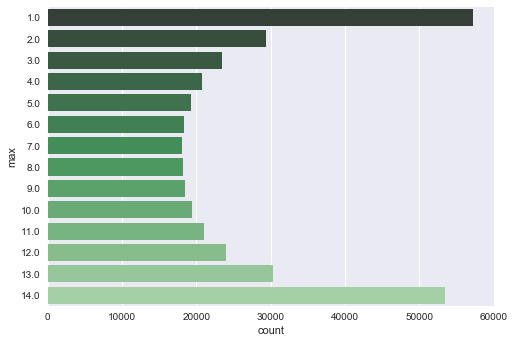

In [14]:
import seaborn as sns
sns.countplot(y='max', data=aud_wlagged, palette="Greens_d")

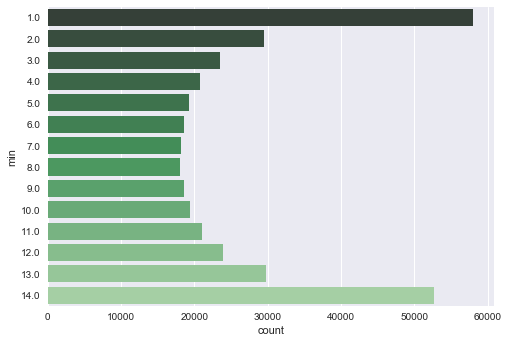

In [15]:
sns.countplot(y='min', data=aud_wlagged, palette="Greens_d")

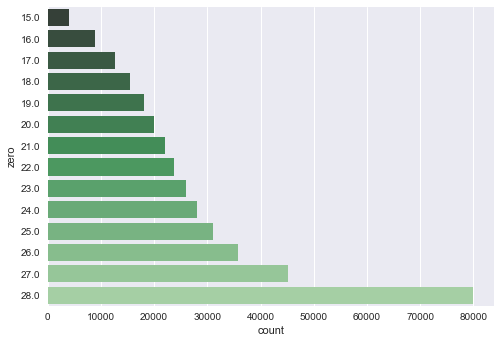

In [16]:
import seaborn as sns
sns.countplot(y='zero', data=aud_wlagged, palette="Greens_d")

In [17]:
# regress how to tell whether it is going to be a max, a min, or closest to zero
# is there a reliable signal for what will be a max, a min, or closest to zero

In [18]:
#aud_wlagged3["time",'return_1','return_8','return_15', "std2", "std8", "std15","max", "min", "zero"]
#aud_wlagged3 = aud_wlagged["time",'return_1','return_8','return_15', "std2", "std8", "std15","max", "min", "zero"]


In [19]:
import statsmodels.formula.api as sm
result = sm.ols(formula="max ~  return_1 + return_8 + return_15 + std2 + std8 + std15 + hour_bucket", data=aud_wlagged).fit()
print result.params

Intercept          7.372718
return_1       -4078.062415
return_8         666.846947
return_15       3500.767766
std2            1812.222477
std8          -10594.011048
std15           7365.686576
hour_bucket        0.005805
dtype: float64


In [20]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                    max   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                 3.470e+04
Date:                Mon, 10 Apr 2017   Prob (F-statistic):               0.00
Time:                        17:05:01   Log-Likelihood:            -1.0090e+06
No. Observations:              370990   AIC:                         2.018e+06
Df Residuals:                  370982   BIC:                         2.018e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       7.3727      0.015    499.671      

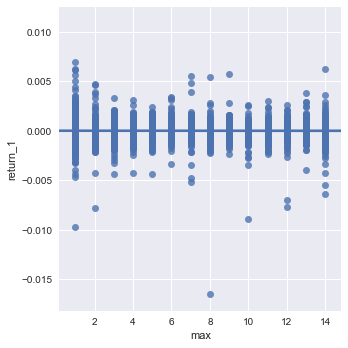

In [21]:
import seaborn as sns
sns.lmplot(x='max',y='return_1',data=aud_wlagged,fit_reg=True)

In [22]:
# project: data acquisition, pre processing, exploration, learning, evaluation (visualization), model/story/prediction/exploration


In [23]:
# how about if returns are positive or negative.. will that explain if returns min or max... doesnt really look like it

In [24]:
#max_dropped = aud_wlagged.drop[aud_wlagged[aud_wlagged['max'] != 1 ]]
max_dropped = aud_wlagged.drop(aud_wlagged[(aud_wlagged['max'] < 14) & (aud_wlagged['max'] > 1)].index)
max_dropped

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,21,22,23,24,25,26,27,28,zero,biggest
15,20160103,172000,17,-0.000137,-0.000014,0.000000,0.72857,7.071068e-05,0.000072,0.000115,...,0.00013,0.00001,0.00002,0.00009,0.00011,0.00007,0.00013,0.00033,28.0,10.5
16,20160103,172100,17,0.000206,0.000027,0.000000,0.72872,1.060660e-04,0.000075,0.000089,...,0.00007,0.00002,0.00014,0.00013,0.00024,0.00026,0.00022,0.00028,28.0,11.0
18,20160103,172400,17,-0.000014,0.000069,0.000137,0.72860,7.071068e-06,0.000071,0.000078,...,0.00006,0.00005,0.00005,0.00010,0.00002,0.00001,0.00012,0.00014,28.0,8.0
19,20160103,172600,17,0.000000,0.000082,0.000192,0.72860,1.682717e-10,0.000065,0.000068,...,0.00009,0.00006,0.00005,0.00005,0.00010,0.00002,0.00001,0.00012,17.0,8.5
26,20160103,173300,17,0.000110,0.000261,0.000343,0.72879,5.656854e-05,0.000070,0.000078,...,0.00019,0.00019,0.00018,0.00007,0.00022,0.00012,0.00013,0.00028,28.0,8.0
29,20160103,173600,17,-0.000027,0.000000,0.000069,0.72872,1.414214e-05,0.000025,0.000070,...,0.00000,0.00000,0.00014,0.00012,0.00012,0.00011,0.00000,0.00015,28.0,8.5
34,20160103,174100,17,0.000549,0.000658,0.000919,0.72927,2.828427e-04,0.000190,0.000152,...,0.00055,0.00048,0.00056,0.00054,0.00055,0.00055,0.00055,0.00069,28.0,7.5
37,20160103,174500,17,0.000082,-0.000014,-0.000014,0.72871,4.242641e-05,0.000197,0.000149,...,0.00000,0.00001,0.00003,0.00001,0.00008,0.00000,0.00002,0.00001,17.0,2.0
50,20160103,175900,17,0.000494,0.001056,0.000795,0.72947,2.545584e-04,0.000271,0.000214,...,0.00078,0.00077,0.00069,0.00069,0.00057,0.00080,0.00076,0.00082,28.0,7.5
52,20160103,180100,18,0.000480,0.001591,0.001563,0.72985,2.474874e-04,0.000419,0.000364,...,0.00097,0.00116,0.00116,0.00115,0.00107,0.00107,0.00095,0.00118,28.0,7.5


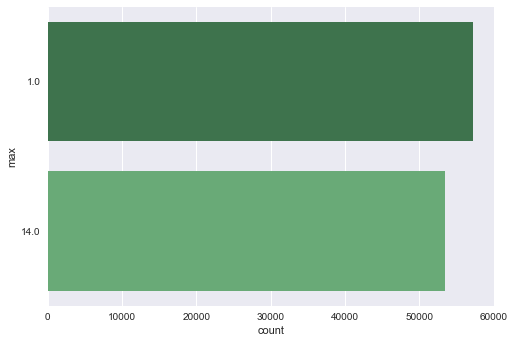

In [25]:
import seaborn as sns
sns.countplot(y='max', data=max_dropped, palette="Greens_d")

In [26]:
result_max = sm.ols(formula="max ~  return_1 + return_8 + return_15 + std2 + std8 + std15 + hour_bucket", data=max_dropped).fit()
print result_max.params

Intercept         6.936415
return_1      -5397.306586
return_8        517.811134
return_15      4844.170652
std2           1430.770102
std8          -5293.095443
std15          5404.658060
hour_bucket       0.009480
dtype: float64


In [27]:
print result_max.summary()

                            OLS Regression Results                            
Dep. Variable:                    max   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.821e+04
Date:                Mon, 10 Apr 2017   Prob (F-statistic):               0.00
Time:                        17:05:24   Log-Likelihood:            -3.2175e+05
No. Observations:              110683   AIC:                         6.435e+05
Df Residuals:                  110675   BIC:                         6.436e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       6.9364      0.033    209.429      

In [28]:
import sklearn.tree
X_max = max_dropped[['max']]
y_max = max_dropped[['return_1','return_8','return_15','hour_bucket','std2','std8','std15']]
dtc_max = sklearn.tree.DecisionTreeClassifier(criterion='gini',max_depth=7)

dtc_max.fit(y_max,X_max)


#Predictions = dtc.predict(Source_data)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [29]:
dtc_max.feature_importances_

array([  6.90363733e-02,   1.42823491e-02,   9.14829392e-01,
         7.51170304e-05,   7.60238670e-04,   4.13033027e-04,
         6.03496891e-04])

In [30]:
from StringIO import StringIO
import IPython.display
import pydot
File_obj = StringIO()
print File_obj

<StringIO.StringIO instance at 0x121f518c0>


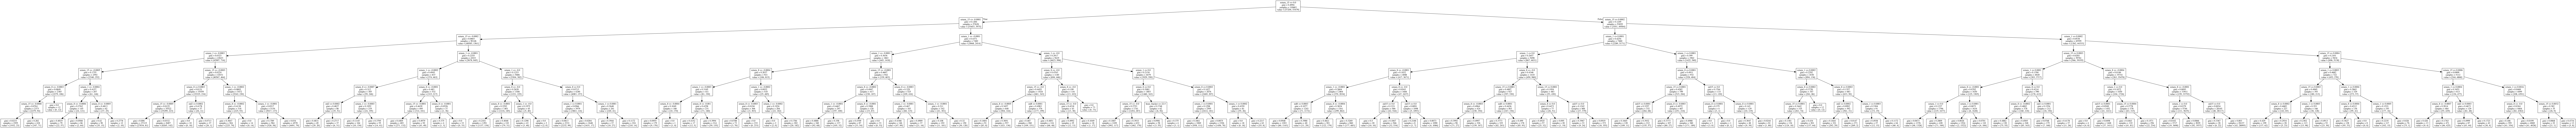

In [31]:
sklearn.tree.export_graphviz(dtc_max, out_file=File_obj, feature_names=['return_1','return_8','return_15',
                                                                    'hour_bucket','std2','std8','std15'])
Graph_max = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph_max[0].create_png())

In [32]:
min_dropped = aud_wlagged.drop(aud_wlagged[(aud_wlagged['min'] < 14) & (aud_wlagged['min'] > 1)].index)
min_dropped

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,21,22,23,24,25,26,27,28,zero,biggest
17,20160103,172300,17,-0.000151,-0.000055,0.000233,0.72861,7.778175e-05,0.000074,0.000081,...,0.00006,0.00004,0.00009,0.00003,0.00002,0.00013,0.00015,0.00011,27.0,7.0
22,20160103,172900,17,0.000000,0.000069,0.000192,0.72872,3.627208e-10,0.000067,0.000070,...,0.00015,0.00005,0.00006,0.00021,0.00018,0.00017,0.00007,0.00002,24.0,5.5
23,20160103,173000,17,0.000000,0.000206,0.000027,0.72872,3.627208e-10,0.000066,0.000072,...,0.00000,0.00015,0.00005,0.00006,0.00021,0.00018,0.00017,0.00007,25.0,6.0
24,20160103,173100,17,0.000014,0.000014,0.000110,0.72873,7.071068e-06,0.000067,0.000077,...,0.00012,0.00001,0.00016,0.00006,0.00007,0.00022,0.00019,0.00018,26.0,6.5
25,20160103,173200,17,-0.000027,0.000137,0.000220,0.72871,1.414214e-05,0.000066,0.000075,...,0.00011,0.00010,0.00001,0.00014,0.00004,0.00005,0.00020,0.00017,27.0,7.0
27,20160103,173400,17,-0.000096,0.000165,0.000288,0.72872,4.949747e-05,0.000059,0.000067,...,0.00014,0.00012,0.00012,0.00011,0.00000,0.00015,0.00005,0.00006,26.0,6.5
33,20160103,174000,17,0.000082,0.000220,0.000371,0.72887,4.242641e-05,0.000058,0.000071,...,0.00008,0.00016,0.00014,0.00015,0.00015,0.00015,0.00029,0.00027,27.0,7.0
34,20160103,174100,17,0.000549,0.000658,0.000919,0.72927,2.828427e-04,0.000190,0.000152,...,0.00055,0.00048,0.00056,0.00054,0.00055,0.00055,0.00055,0.00069,28.0,7.5
35,20160103,174200,17,-0.000521,0.000233,0.000425,0.72889,2.687006e-04,0.000187,0.000145,...,0.00015,0.00017,0.00010,0.00018,0.00016,0.00017,0.00017,0.00017,15.0,3.0
48,20160103,175700,17,-0.000082,-0.000069,-0.000192,0.72873,4.242641e-05,0.000066,0.000154,...,0.00005,0.00005,0.00017,0.00006,0.00002,0.00008,0.00016,0.00054,28.0,13.0


In [33]:
result_min = sm.ols(formula="min ~  return_1 + return_8 + return_15 + std2 + std8 + std15 + hour_bucket", data=min_dropped).fit()
print result_min.params

Intercept         7.776366
return_1       5234.913637
return_8       -660.915395
return_15     -4720.721969
std2           2050.644661
std8          -4516.265065
std15          1540.368949
hour_bucket      -0.015596
dtype: float64


In [34]:
print result_min.summary()

                            OLS Regression Results                            
Dep. Variable:                    min   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                 1.782e+04
Date:                Mon, 10 Apr 2017   Prob (F-statistic):               0.00
Time:                        17:05:27   Log-Likelihood:            -3.2222e+05
No. Observations:              110651   AIC:                         6.445e+05
Df Residuals:                  110643   BIC:                         6.445e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       7.7764      0.033    233.666      

In [35]:
import sklearn.tree
X_min = min_dropped[['min']]
y_min = min_dropped[['return_1','return_8','return_15','hour_bucket','std2','std8','std15']]
dtc_min = sklearn.tree.DecisionTreeClassifier(criterion='gini',max_depth=6)

dtc_min.fit(y_min,X_min)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

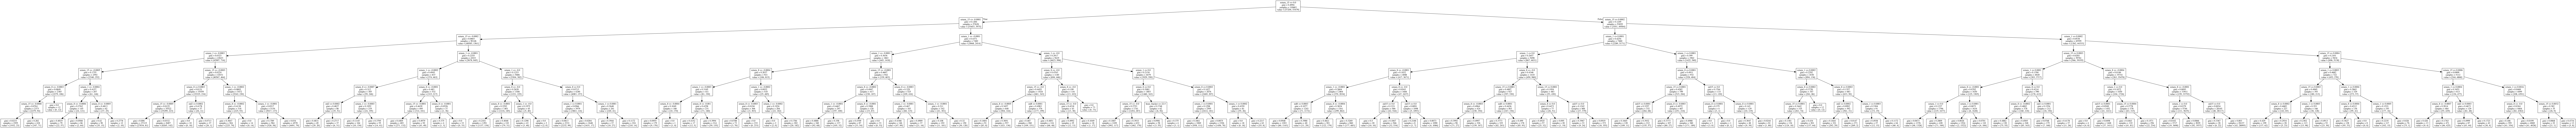

In [36]:
sklearn.tree.export_graphviz(dtc_min, out_file=File_obj, feature_names=['return_1','return_8','return_15',
                                                                    'hour_bucket','std2','std8','std15'])
Graph_min = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph_min[0].create_png())

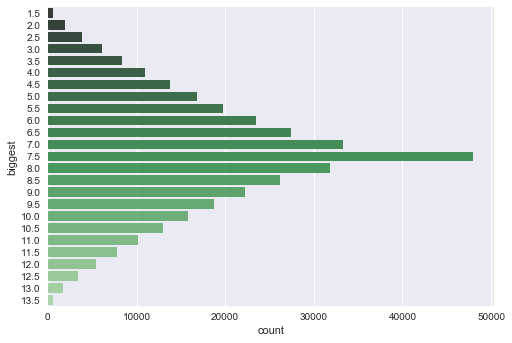

In [37]:
sns.countplot(y='biggest', data=aud_wlagged, palette="Greens_d")

In [38]:
result_biggest = sm.ols(formula="biggest ~    std2 + std8 + std15  ", data=aud_wlagged).fit()
print result_biggest.params
#return_1 + return_8 + return_15 + std8 +

Intercept        7.622648
std2          2232.181009
std8        -10881.652633
std15         6372.167704
dtype: float64


In [39]:
print result_biggest.summary()

                            OLS Regression Results                            
Dep. Variable:                biggest   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                 1.627e+04
Date:                Mon, 10 Apr 2017   Prob (F-statistic):               0.00
Time:                        17:05:30   Log-Likelihood:            -8.0204e+05
No. Observations:              370990   AIC:                         1.604e+06
Df Residuals:                  370986   BIC:                         1.604e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.6226      0.006   1303.451      0.0

In [40]:
import sklearn.cluster
colouring = numpy.array(['red','blue'])
clusterer = sklearn.cluster.KMeans(n_clusters = 2)
cluster_suggestions = clusterer.fit_predict(aud_wlagged)
cluster_suggestions

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

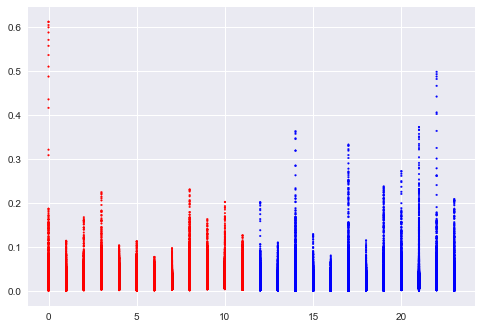

In [41]:
x_kmeans = aud_wlagged ['hour_bucket']
y_kmeans = aud_wlagged ['std15']*100
colour_by_cluster = colouring[cluster_suggestions]
matplotlib.pyplot.scatter(x_kmeans,y_kmeans, s=3, color = colour_by_cluster)

In [42]:
dbscan = sklearn.cluster.DBSCAN(eps = 0.4, min_samples=3)
dbscan


DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [43]:
dbscan_suggestions = dbscan.fit_predict(aud_wlagged)
dbscan_suggestions

array([-1, -1, -1, ..., -1, -1, -1])

In [44]:
colouringdbscan = numpy.array(['red','blue','green','purple','black'])

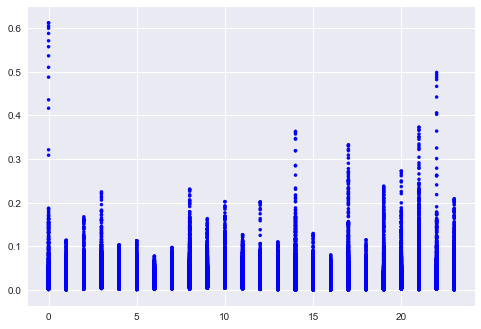

In [45]:

matplotlib.pyplot.scatter(x_kmeans,y_kmeans, s=10, color = colouring[dbscan_suggestions])

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_max = RandomForestClassifier(n_estimators = 200)

X = max_dropped[['return_1','return_8','return_15','hour_bucket','std2','std8','std15','max']].dropna()

y = X['max']

X.drop('max', axis=1, inplace=True)

model_max.fit(X, y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [47]:
model_max.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [48]:
features = X.columns
feature_importances = model_max.feature_importances_
features_df = pandas.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
2,return_15,0.621947
1,return_8,0.229641
0,return_1,0.056558
6,std15,0.031424
5,std8,0.030124


In [49]:
import os

In [50]:
from sklearn import tree
from sklearn import preprocessing

In [51]:

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [52]:
# Get survival probability
preds = tree_model.predict_proba(X = pandas.DataFrame(X))

pandas.crosstab(preds[:,0], max_dropped["return_15"])

return_15,-0.016699307,-0.01636081,-0.015883318,-0.015849892,-0.01437801,-0.013772621,-0.012037429,-0.011986744,-0.011272178,-0.010949464,...,0.007519141,0.007654117,0.007970252,0.008001035,0.008011827,0.008159604,0.008341377,0.008804617,0.010009492,0.011344603
row_0,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1.0,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:

from sklearn.cross_validation import train_test_split

In [54]:
from sklearn.cross_validation import KFold

cv = KFold(n=len(max_dropped),  # Number of elements
           n_folds=50,            # Desired number of cv folds
           random_state=60)       # Set a random seed

In [55]:
fold_accuracy = []

#titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv:
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    model = tree_model.fit(X, y)
    valid_acc = model.score(X, y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

('Accuracy per fold: ', [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], '\n')
('Average accuracy: ', 1.0)


In [56]:
from sklearn.cross_validation import cross_val_score

In [57]:
scores = cross_val_score(dtc_max, X, y, scoring ='accuracy', cv = 300)

In [58]:
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.96486486  0.95405405  0.96486486  0.95675676  0.94594595  0.95135135
  0.95945946  0.96486486  0.95135135  0.96216216  0.94324324  0.96486486
  0.95945946  0.96756757  0.96486486  0.95405405  0.97027027  0.95945946
  0.97297297  0.96216216  0.94864865  0.97567568  0.93783784  0.97297297
  0.94054054  0.97297297  0.97567568  0.95405405  0.94864865  0.97567568
  0.95945946  0.96216216  0.95405405  0.96756757  0.97837838  0.95675676
  0.95135135  0.95135135  0.95945946  0.96756757  0.94594595  0.95135135
  0.97297297  0.96216216  0.96486486  0.97837838  0.95675676  0.93783784
  0.96216216  0.95675676  0.96486486  0.96756757  0.97027027  0.94864865
  0.95405405  0.95405405  0.97027027  0.95405405  0.94864865  0.96756757
  0.97297297  0.95405405  0.96756757  0.97297297  0.97027027  0.95405405
  0.95945946  0.94864865  0.94594595  0.95405405  0.93513514  0.95945946
  0.97027027  0.94864865  0.95675676  0.95675676  0.96486486  0.95405405
  0.96216216  0.95663957  0.970

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [61]:
# Set the seed
numpy.random.seed(12)

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=1000, # Number of trees
                                  max_features=3,    # Num features considered
                                  oob_score=True)    # Use OOB scoring*

# Train the model
rf_model.fit(X, y)

print("OOB accuracy: ")
print(rf_model.oob_score_)

OOB accuracy: 
0.963508397857


In [62]:
for feature, imp in zip(features, rf_model.feature_importances_):
    print(feature, imp)

('return_1', 0.061429904434164219)
('return_8', 0.20493400045237983)
('return_15', 0.65044397123351438)
('hour_bucket', 0.011687320749908569)
('std2', 0.015461640124772798)
('std8', 0.027075566005790509)
('std15', 0.028967596999470543)
